# Analyzing clonal diversity

The example data is from [Minervina et al. eLife 2021](http://dx.doi.org/10.7554/elife.63502)

In [1]:
import numpy as np
import pandas as pd
import pyrepseq as prs
import pyrepseq.plotting as pp
import matplotlib.pyplot as plt

In [2]:
!wget https://zenodo.org/record/4065547/files/beta.zip?download=1 -O data/temp.zip
!unzip -jo data/temp.zip -d data/minervina
!rm data/temp.zip

--2022-11-15 11:34:54--  https://zenodo.org/record/4065547/files/beta.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674858923 (644M) [application/octet-stream]
Saving to: ‘data/temp.zip’

data/temp.zip       100%[===================>] 643.59M  2.18MB/s    in 8m 55s  

2022-11-15 11:43:50 (1.20 MB/s) - ‘data/temp.zip’ saved [674858923/674858923]

Archive:  data/temp.zip
replace data/minervina/M_15_CD4_beta.txt.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
files = ['F1_2018', 'F1_2019', '15_F1', '30_F1', '45_F1', '85_F1']
dfs = {file: pd.read_csv(f'data/minervina/W_{file}_beta.txt.gz', sep='\t') for file in files}

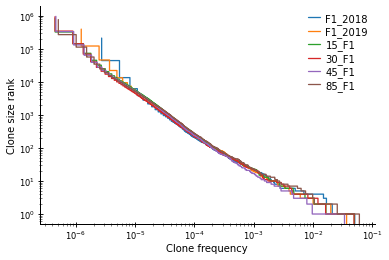

In [3]:
for file, df in dfs.items():
    pp.rankfrequency(df['cloneCount'], label=file)
plt.legend()

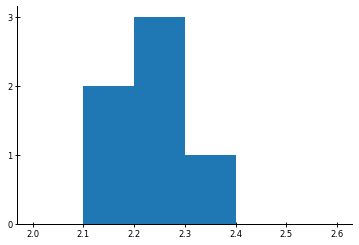

In [4]:
mles = [prs.powerlaw_mle_alpha(df['cloneCount'], cmin=16.0) for df in dfs.values()]
plt.hist(mles, bins=np.arange(2.0, 2.6, 0.1));
plt.yticks(np.arange(0, 4, 1));